In [1]:
import numpy as np
from gurobipy import *
import random
import matplotlib.pyplot as plt
import csv

In [2]:
data=[]

data = np.loadtxt('C:/Users/user/test/data/breast-cancer-wisconsin.data',delimiter=',',dtype=str)

In [3]:
data=data[:,1:]

In [4]:
data

array([['5', '1', '1', ..., '1', '1', '2'],
       ['5', '4', '4', ..., '2', '1', '2'],
       ['3', '1', '1', ..., '1', '1', '2'],
       ...,
       ['5', '10', '10', ..., '10', '2', '4'],
       ['4', '8', '6', ..., '6', '1', '4'],
       ['4', '8', '8', ..., '4', '1', '4']], dtype='<U8')

In [5]:
L=len(data)
l=len(data[0])-1
cn = len(np.unique(list(zip(*data))[l]))

In [6]:
x=[]
for i in range(L):
    x.append(i)
    for j in range(l):
        if data[i,j]=='?':
            x.remove(i)
data = data[x]
data = data.astype('float64')

In [7]:
ci=2 # class identifier
smallnum=1.e-3
bignum=1.e+3

In [8]:
L=len(data)
l = len(data[0])-1
#data1 = np.c_[data,np.zeros(L)]

np.random.shuffle(data)

In [9]:
train=data[:int((len(data)+1)*.80)]
test=data[int(len(data)*.80+1):]

In [10]:
len(train)

547

In [11]:
len(test)

136

In [12]:
len(data)

683

In [13]:
Atrain=list()
Btrain=list()
Atest=list()
Btest=list()

In [14]:
for i in range(len(train)):
    if train[i,-1] == 2:
        Atrain.append(train[i])
    else : 
        Btrain.append(train[i])

Atrain=np.array(Atrain)
Btrain=np.array(Btrain)

lA = len(Atrain)
lB = len(Btrain)

In [15]:
lA

356

In [16]:
m=Model()
w=[]
y=[]
z=[]

Academic license - for non-commercial use only


In [17]:
r=m.addVar(vtype=GRB.CONTINUOUS, name='r')

for i in range(lA):
    y.append(m.addVar(vtype=GRB.CONTINUOUS, name="y[{}]".format(i),lb=0))
    
for i in range(lB):
    z.append(m.addVar(vtype=GRB.CONTINUOUS, name="z[{}]".format(i),lb=0))
    
for i in range(l):
    w.append(m.addVar(vtype=GRB.CONTINUOUS, name="w[{}]".format(i),lb=-100,ub=100))

m.update()

In [18]:
Y=sum(y[i] for i in range(lA))
Z=sum(z[i] for i in range(lB))

m.setObjective(Y/lA + Z/lB , GRB.MINIMIZE)
m.update()

In [19]:
w

[<gurobi.Var w[0]>,
 <gurobi.Var w[1]>,
 <gurobi.Var w[2]>,
 <gurobi.Var w[3]>,
 <gurobi.Var w[4]>,
 <gurobi.Var w[5]>,
 <gurobi.Var w[6]>,
 <gurobi.Var w[7]>,
 <gurobi.Var w[8]>]

In [20]:
for i in range(lA):
    m.addConstr(sum(Atrain[i,j]*w[j] for j in range(l))-r+y[i] >=smallnum, name = "cty[{}]".format(i))
m.update()
for i in range(lB):
    m.addConstr(sum(Btrain[i,j]*w[j] for j in range(l))-r-z[i] <=-smallnum, name = "ctz[{}]".format(i))
m.update()

m.optimize()

Optimize a model with 547 rows, 557 columns and 6017 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [3e-03, 5e-03]
  Bounds range     [1e+02, 1e+02]
  RHS range        [1e-03, 1e-03]
Presolve time: 0.01s
Presolved: 547 rows, 557 columns, 6017 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   7.467505e+04   0.000000e+00      0s
     315    7.0571331e-04   0.000000e+00   0.000000e+00      0s

Solved in 315 iterations and 0.04 seconds
Optimal objective  7.057133058e-04


In [21]:
for i in range(len(test)):
    if test[i,-1]==2:
        Atest.append(test[i])
    else : 
        Btest.append(test[i])

Atest = np.array(Atest)
Btest = np.array(Btest)

fail = 0
faila=0
failb=0
for i in range(len(Atest)):
    if(sum(Atest[i,j]*w[j].x for j in range(l))<r.x):
        fail +=1
        faila+=1

for i in range(len(Btest)):
    if(sum(Btest[i,j]*w[j].x for j in range(l))>r.x):
        fail+=1
        failb+=1

In [22]:
len(Atest)

88

In [23]:
faila

15

In [24]:
success_rate = (len(test)-fail)*100/len(test)
print(success_rate)

86.02941176470588


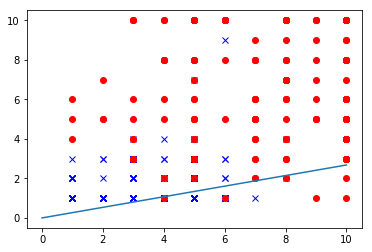

In [25]:
plt.figure()

for i in range(lA):
    if Atrain[i][-1]==2:
        plt.plot(Atrain[i][0],Atrain[i][1], 'bx')
        
for i in range(lB):
    if Btrain[i][-1]==4:
        plt.plot(Btrain[i][0],Btrain[i][1],'ro')

X= np.linspace(0,10,200)

plt.plot(X,-w[0].x/w[1].x*X+r.x/w[1].x)

plt.show()